#### Reference: Mario Dobler and Tim Gromann (2019): “Data Visualization with Python: Create an impact with meaningful data insights using interactive and engaging visuals”, Packt Publishing

## Scatter plot with marginal histograms

In this activity, we will make use of GridSpec to visualize a scatter plot with marginal histograms.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# Load dataset
data = pd.read_csv('./data/anage_data.csv')

In [10]:
data

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,4214,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,...,NaN,15000.00,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN
4214,4215,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,...,NaN,5062.00,wild,medium,acceptable,NaN,999.00,NaN,NaN,NaN
4215,4216,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,...,NaN,0.04,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN
4216,4217,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,...,NaN,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN


The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Select all samples of the class Aves and with a body mass smaller than 20,000.

In [4]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
data

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
11,11,18,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,americanus,American toad,...,NaN,36.0,captivity,medium,acceptable,NaN,NaN,0.00829,21.60,288.00
19,19,26,Animalia,Chordata,Amphibia,Anura,Bufonidae,Anaxyrus,terrestris,Southern toad,...,NaN,10.0,captivity,medium,acceptable,NaN,NaN,0.00698,19.20,288.00
29,29,36,Animalia,Chordata,Amphibia,Anura,Bufonidae,Rhinella,marina,Cane toad,...,NaN,24.8,captivity,large,acceptable,NaN,NaN,0.03030,105.00,293.00
53,53,60,Animalia,Chordata,Amphibia,Anura,Hylidae,Hyla,versicolor,Gray treefrog,...,NaN,7.8,captivity,medium,acceptable,NaN,NaN,0.00433,6.97,290.50
78,78,85,Animalia,Chordata,Amphibia,Anura,Pipidae,Xenopus,laevis,African clawed frog,...,NaN,30.3,captivity,large,acceptable,NaN,NaN,0.01200,63.60,288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,3176,3194,Animalia,Chordata,Reptilia,Squamata,Scincidae,Eumeces,obsoletus,Great Plains skink,...,NaN,7.3,captivity,small,acceptable,NaN,NaN,0.02060,30.00,300.50
3181,3182,3200,Animalia,Chordata,Reptilia,Squamata,Scincidae,Tiliqua,scincoides,Australian blue-tongued lizard,...,NaN,26.6,captivity,large,acceptable,NaN,NaN,0.21270,493.00,303.00
3187,3188,3206,Animalia,Chordata,Reptilia,Squamata,Teiidae,Cnemidophorus,tigris,Western whiptail,...,NaN,7.8,wild,medium,acceptable,NaN,NaN,0.01700,18.00,304.25
3302,3303,3322,Animalia,Chordata,Reptilia,Testudines,Emydidae,Chrysemys,picta,Painted turtle,...,NaN,61.0,wild,medium,acceptable,NaN,NaN,0.02360,400.00,289.50


In [5]:
# Sort according to class
aves = data[data['Class'] == 'Aves']
aves = aves[aves[mass] < 20000]

In [6]:
aves

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
184,184,192,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Accipiter,nisus,Eurasian sparrowhawk,...,0.258,20.2,wild,medium,acceptable,NaN,NaN,0.951600,135.0,NaN
189,189,197,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Aquila,chrysaetos,Golden eagle,...,0.126,48.0,captivity,medium,acceptable,NaN,NaN,4.992900,3000.0,NaN
199,199,207,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,lineatus,Red-shouldered hawk,...,NaN,22.4,wild,medium,acceptable,NaN,NaN,2.110000,658.0,NaN
214,214,222,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Geranoaetus,melanoleucus,Black-chested buzzard-eagle,...,NaN,42.0,captivity,medium,acceptable,NaN,NaN,5.188700,2860.0,NaN
232,232,240,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Pernis,apivorus,Western honey-buzzard,...,NaN,29.0,wild,medium,acceptable,NaN,NaN,2.364280,652.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1342,1351,Animalia,Chordata,Aves,Strigiformes,Strigidae,Micrathene,whitneyi,Elf owl,...,NaN,14.0,captivity,small,acceptable,NaN,NaN,0.259435,45.9,NaN
1348,1348,1357,Animalia,Chordata,Aves,Strigiformes,Strigidae,Strix,occidentalis,Spotted owl,...,NaN,25.0,captivity,small,acceptable,NaN,NaN,2.675000,571.0,NaN
1354,1354,1363,Animalia,Chordata,Aves,Suliformes,Anhingidae,Anhinga,anhinga,Anhinga,...,NaN,16.4,captivity,tiny,acceptable,NaN,NaN,3.225800,1040.0,NaN
1361,1361,1370,Animalia,Chordata,Aves,Suliformes,Phalacrocoracidae,Phalacrocorax,auritus,Double-crested cormorant,...,0.171,22.5,wild,large,acceptable,NaN,NaN,5.609600,1330.0,NaN


Create a figure with constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a figure title.

In [8]:
aves

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
184,184,192,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Accipiter,nisus,Eurasian sparrowhawk,...,0.258,20.2,wild,medium,acceptable,NaN,NaN,0.951600,135.0,NaN
189,189,197,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Aquila,chrysaetos,Golden eagle,...,0.126,48.0,captivity,medium,acceptable,NaN,NaN,4.992900,3000.0,NaN
199,199,207,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,lineatus,Red-shouldered hawk,...,NaN,22.4,wild,medium,acceptable,NaN,NaN,2.110000,658.0,NaN
214,214,222,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Geranoaetus,melanoleucus,Black-chested buzzard-eagle,...,NaN,42.0,captivity,medium,acceptable,NaN,NaN,5.188700,2860.0,NaN
232,232,240,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Pernis,apivorus,Western honey-buzzard,...,NaN,29.0,wild,medium,acceptable,NaN,NaN,2.364280,652.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1342,1351,Animalia,Chordata,Aves,Strigiformes,Strigidae,Micrathene,whitneyi,Elf owl,...,NaN,14.0,captivity,small,acceptable,NaN,NaN,0.259435,45.9,NaN
1348,1348,1357,Animalia,Chordata,Aves,Strigiformes,Strigidae,Strix,occidentalis,Spotted owl,...,NaN,25.0,captivity,small,acceptable,NaN,NaN,2.675000,571.0,NaN
1354,1354,1363,Animalia,Chordata,Aves,Suliformes,Anhingidae,Anhinga,anhinga,Anhinga,...,NaN,16.4,captivity,tiny,acceptable,NaN,NaN,3.225800,1040.0,NaN
1361,1361,1370,Animalia,Chordata,Aves,Suliformes,Phalacrocoracidae,Phalacrocorax,auritus,Double-crested cormorant,...,0.171,22.5,wild,large,acceptable,NaN,NaN,5.609600,1330.0,NaN


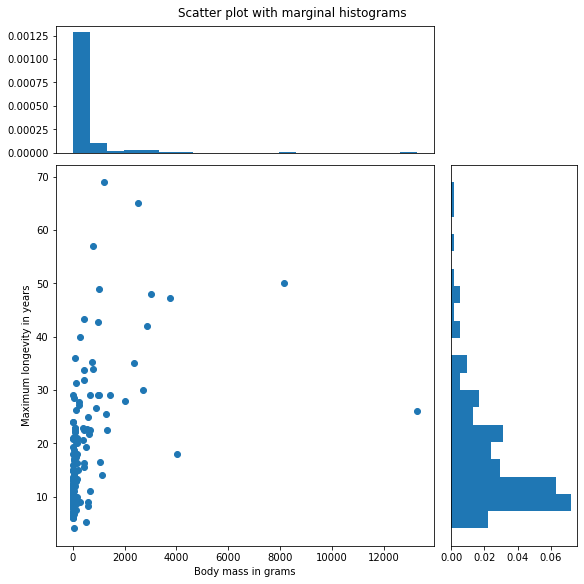

In [13]:
# Create figure
fig = plt.figure(figsize=(8, 8), dpi=72, constrained_layout=True)

# Create gridspec
gs = fig.add_gridspec(4, 4)

# Specify subplots
histx_ax = fig.add_subplot(gs[0, :-1]) # row index = 0, col index = [0, 1, 2]
histy_ax = fig.add_subplot(gs[1:, -1])
scatter_ax = fig.add_subplot(gs[1:, :-1])

# Create plots
scatter_ax.scatter(aves[mass], aves[longevity])
histx_ax.hist(aves[mass], bins=20, density=True)
histx_ax.set_xticks([])
histy_ax.hist(aves[longevity], bins=20, density=True, orientation='horizontal')
histy_ax.set_yticks([])

# Add labels and title
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')

# Show plot
plt.show()